In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


### 1. **Load the dataset** 

In [2]:
dataset_path = '/kaggle/input/bank-marketing/bank-additional-full.csv'
bank_df = pd.read_csv(dataset_path,  delimiter=';')

print("Dataset Preview:")
print(bank_df.head())

print("\nDataset Information:")
print(bank_df.info())

print("\nSummary Statistics:")
print(bank_df.describe(include="all"))

Dataset Preview:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  eurib

### 2. **Missing Values**

In [3]:
import random
import numpy as np

def add_random_missing_values(dataframe: pd.DataFrame, missing_rate: float = 0.05) -> pd.DataFrame:
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)
        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

missing_rate = 0.1
bank_df_with_missing = add_random_missing_values(bank_df, missing_rate)

print("\nMissing Values Count:")
print(bank_df_with_missing.isnull().sum())


Missing Values Count:
age               3992
job               3933
marital           3983
education         3888
default           3813
housing           3912
loan              3937
contact           4023
month             3964
day_of_week       3958
duration          3954
campaign          3846
pdays             3967
previous          3959
poutcome          3890
emp.var.rate      3828
cons.price.idx    3895
cons.conf.idx     3787
euribor3m         3860
nr.employed       4012
y                 3881
dtype: int64


#### 2.1 **visualize the missing data pattern using a heatmap**

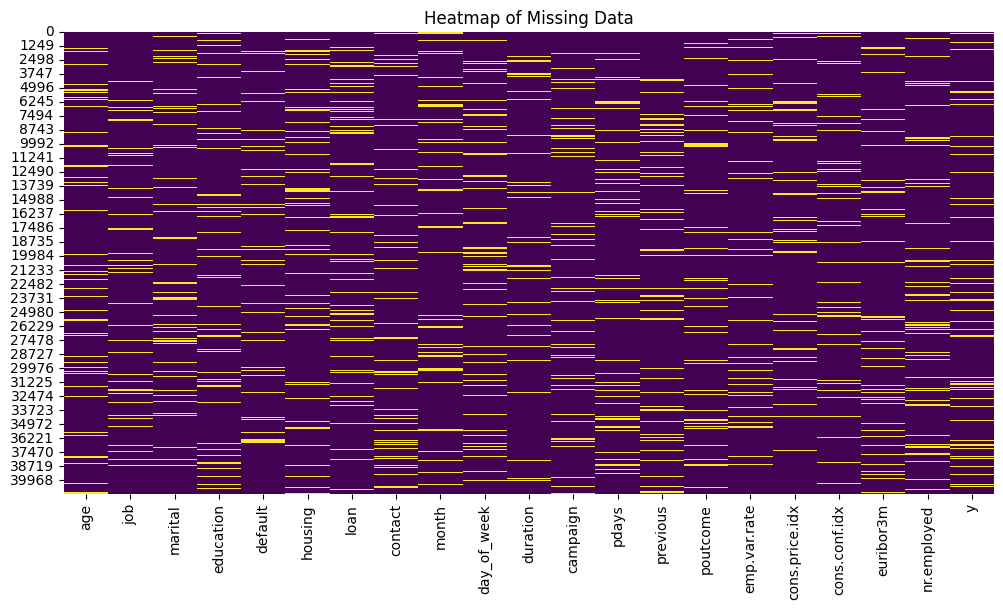

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(bank_df_with_missing.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Data")
plt.show()

### 3. **Handle Missing Values**

In [5]:
categorical_columns = bank_df_with_missing.select_dtypes(include=["object"]).columns
numerical_columns = bank_df_with_missing.select_dtypes(include=["number"]).columns

for column in categorical_columns:
    bank_df_with_missing[column] = bank_df_with_missing[column].fillna(bank_df_with_missing[column].mode()[0])

for column in numerical_columns:
    bank_df_with_missing[column] = bank_df_with_missing[column].fillna(bank_df_with_missing[column].mean())
    
print("\nMissing Values After Imputation:")
print(bank_df_with_missing.isnull().sum())


Missing Values After Imputation:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### 4. **Exploratory Data Analysis (EDA)**

In [6]:
binary_columns = ['default', 'housing', 'loan', 'y']

# yes -> 1, no -> 0
for column in binary_columns:
    bank_df_with_missing[column] = bank_df_with_missing[column].map({'yes': 1, 'no': 0})

non_binary_columns = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

bank_df_with_missing = pd.get_dummies(bank_df_with_missing, columns=non_binary_columns, drop_first=True)

print("Columns after encoding:")
print(bank_df_with_missing.columns)

Columns after encoding:
Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


#### 4.1 **Numerical Data Analysis**

In [7]:
print("Column Names in DataFrame:")
print(bank_df_with_missing.columns)

Column Names in DataFrame:
Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


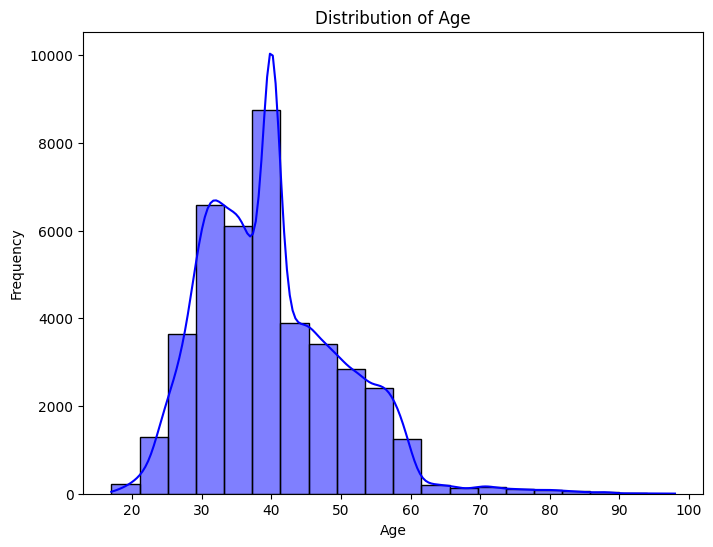

In [8]:
# age distribution

plt.figure(figsize=(8, 6))
sns.histplot(bank_df_with_missing["age"], kde=True, bins=20, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

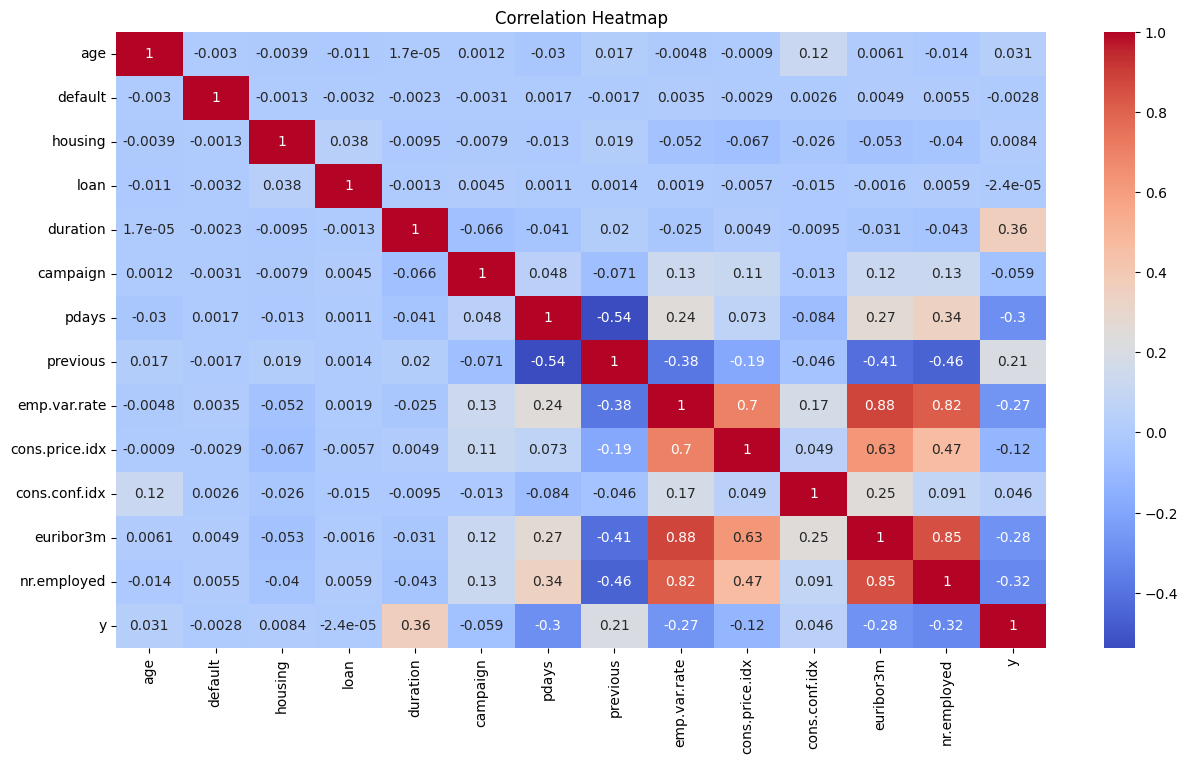

In [9]:
# correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# only numerical cols
numerical_data = bank_df_with_missing.select_dtypes(include=["number"])

plt.figure(figsize=(15, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### **4.2 Categorical Data Analysis**

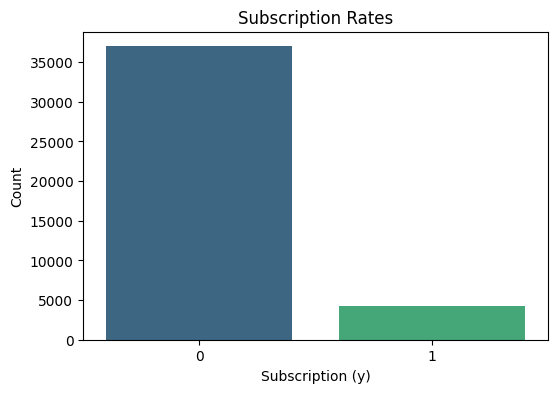

In [10]:
# Count of subscription rates
subscription_counts = bank_df_with_missing["y"].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=subscription_counts.index, y=subscription_counts.values, palette="viridis")
plt.title("Subscription Rates")
plt.ylabel("Count")
plt.xlabel("Subscription (y)")
plt.show()

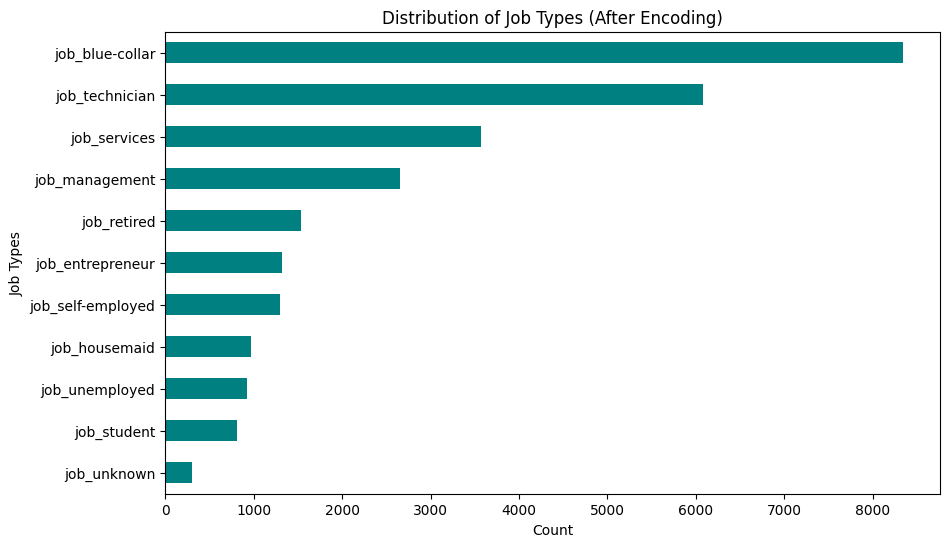

In [11]:
# extract the one hot encoded job cols
job_columns = [col for col in bank_df_with_missing.columns if col.startswith("job_")]

job_distribution = bank_df_with_missing[job_columns].sum()

plt.figure(figsize=(10, 6))
job_distribution.sort_values().plot(kind="barh", color="teal")
plt.title("Distribution of Job Types (After Encoding)")
plt.xlabel("Count")
plt.ylabel("Job Types")
plt.show()

### 5. Statistical Analysis

In [12]:
# statistical measures for numerical columns
print("\nStatistical Analysis:")
print(f"Mean Age: {bank_df_with_missing['age'].mean().round(3)}")
print(f"Median Age: {bank_df_with_missing['age'].median().round(3)}")
print(f"Standard Deviation of Age: {bank_df_with_missing['age'].std().round(3)}")


Statistical Analysis:
Mean Age: 40.043
Median Age: 40.0
Standard Deviation of Age: 9.925


### **6. Feature Selection and Engineering**

**Drop irrelevant or highly correlated features**

In [13]:
threshold = 0.9
correlation_matrix = bank_df_with_missing.corr()
high_correlation_features = [
    column
    for column in correlation_matrix.columns
    if any(correlation_matrix[column].abs() > threshold) and column != "y"
]
print("\nHighly correlated features to drop:", high_correlation_features)

bank_df_selected = bank_df_with_missing.drop(columns=high_correlation_features)

print("\nSelected Features:")
print(bank_df_selected.columns)


Highly correlated features to drop: ['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']

Selected Features:
Index(['y'], dtype='object')


### **7. Conclusion and Recommendations**

### Conclusion
- The dataset represents client data from a Portuguese bank's marketing campaigns.
- Missing values were introduced and handled using imputation (mode for categorical and mean for numerical)
- Insights:
  - Age is normally distributed with a mean around 40 years.
  - Most clients work in "blue-collar" and "technician" jobs.
  - Subscription rates for term deposits are low (around 12%).
  - Features like `duration` and `poutcome` are strongly correlated with subscription (`y`).

### Recommendations
- In order to improve marketing strategies, it is necessary to focus on customers with positive `poutcome` and higher `duration` values.
- Use the the dataset for further modeling to predict subscription likelihood.

### Key insights
- Clients in certain age groups are more likely to subscribe to a term deposit.
- The outcome of previous campaigns influences client behavior.
- Call duration is a critical feature but must be handled to avoid data leakage.
- Employment variation rate, consumer confidence index, and euribor rates are correlated with subscription rates.